<a href="https://colab.research.google.com/github/fedenemi/Innocation_Curves/blob/main/Innovation_curves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Which Factors Can Be Found As Being In Correlated With Sundry Measurements Of Innovation?**

Links to dataset sources:

*   https://www.wipo.int/ipstats/en/
*   https://data.oecd.org/students/tertiary-graduates-by-field.htm
*   https://en.wikipedia.org/wiki/List_of_countries_by_population_(United_Nations)
*   https://en.wikipedia.org/wiki/List_of_countries_by_tertiary_education_attainment
*   https://en.wikipedia.org/wiki/List_of_countries_by_secondary_education_attainment
*   https://www.kaggle.com/narmelan/global-unicorns-2019/notebooks
*   https://www.natureindex.com/annual-tables/2020/country/all
*   https://en.wikipedia.org/wiki/International_Innovation_Index





In [1]:
#import libraries and set up notebook for matplotlib
%matplotlib
%matplotlib inline
from google.colab import files
import requests, json
from bs4 import BeautifulSoup
import re   
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import os
from google.colab import files
import csv
import io
from __future__ import division
import scipy.stats as stats
from pandas.plotting import scatter_matrix
import seaborn as sns

Using matplotlib backend: agg


In [ ]:
# upload file and map it into a pandas dataframe

In [2]:
a=files.upload()

Saving patent_2.csv to patent_2.csv


In [3]:
dff=pd.read_csv(io.StringIO(a["patent_2.csv"].decode('utf-8')), skiprows=5, usecols=range(44))



In [4]:
df=dff
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Origin,Origin (Code),Office,Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AF,Total,Total,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,1.0,2.0,1.0,1.0,NaN,11.0,4.0,7.0,5.0
2,Afghanistan,AF,Total,Abroad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,1.0,2.0,1.0,1.0,NaN,11.0,4.0,7.0,5.0
3,Albania,AL,Total,Total,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,5.0,3.0,12.0,6.0,1.0,12.0,4.0
4,Albania,AL,Total,Resident,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,3.0,3.0,9.0,5.0,NaN,9.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557,Zambia,ZM,Total,Resident,NaN,NaN,2.0,NaN,NaN,10.0,NaN,NaN,NaN,3.0,1.0,2.0,2.0,2.0,NaN,5.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,1.0,2.0,NaN,2.0,1.0,NaN,1.0,2.0,6.0,3.0,3.0,5.0,4.0,1.0
558,Zambia,ZM,Total,Abroad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,NaN,NaN,NaN,NaN,3.0,1.0,NaN,1.0,NaN,NaN,1.0,NaN,7.0,1.0,158.0
559,Zimbabwe,ZW,Total,Total,24.0,9.0,19.0,16.0,17.0,2.0,21.0,31.0,18.0,14.0,9.0,20.0,8.0,14.0,NaN,11.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,1.0,2.0,9.0,5.0,3.0,133.0,1.0,1.0,1.0,72.0,1.0,NaN,1.0,2.0
560,Zimbabwe,ZW,Total,Resident,24.0,5.0,19.0,16.0,17.0,2.0,21.0,31.0,18.0,14.0,9.0,20.0,8.0,14.0,NaN,11.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Data cleaning

In [6]:
df=df.dropna()
df[df["Unnamed: 3"]=="Total"]

df=df.iloc[1:,np.r_[0:1,2:44]]


In [7]:
df.columns=['LOCATION', 'office', 'type', '1980', '1981', '1982',
       '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016_patents', '2017_patents', '2018_patents',
       '2019_patents']

df.head()

,LOCATION,office,type,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016_patents,2017_patents,2018_patents,2019_patents
28,Austria,Total,Resident,1227.0,1120.0,1158.0,1116.0,1187.0,1045.0,1116.0,1235.0,1260.0,1188.0,1176.0,1065.0,961.0,934.0,1137.0,1195.0,1485.0,1385.0,1442.0,1348.0,1170.0,1447.0,1688.0,1732.0,1421.0,1304.0,1983.0,1556.0,1729.0,1520.0,1622.0,1747.0,2041.0,1906.0,1718.0,2180.0,2354.0,2446.0,2660.0,2632.0
39,Bangladesh,Total,Total,7.0,17.0,13.0,11.0,17.0,13.0,26.0,10.0,8.0,3.0,8.0,10.0,6.0,10.0,29.0,6.0,18.0,15.0,14.0,26.0,4.0,21.0,24.0,15.0,44.0,21.0,16.0,28.0,14.0,28.0,21.0,6.0,15.0,19.0,25.0,3.0,6.0,11.0,17.0,17.0
48,Belgium,Total,Total,847.0,807.0,915.0,796.0,970.0,733.0,755.0,214.0,135.0,547.0,210.0,395.0,652.0,565.0,1636.0,1744.0,2700.0,2873.0,3029.0,3296.0,3108.0,3215.0,3391.0,3685.0,3084.0,3336.0,3526.0,3416.0,4031.0,4224.0,5030.0,5229.0,6243.0,6187.0,6029.0,6370.0,8139.0,7974.0,8252.0,8568.0
72,Brazil,Total,Total,351.0,845.0,1308.0,776.0,584.0,608.0,442.0,289.0,487.0,474.0,453.0,341.0,255.0,378.0,671.0,701.0,405.0,241.0,649.0,756.0,310.0,921.0,911.0,302.0,255.0,535.0,593.0,350.0,629.0,732.0,806.0,947.0,1027.0,1241.0,1314.0,1384.0,1465.0,1628.0,1976.0,1853.0
78,Bulgaria,Total,Total,1276.0,1427.0,1428.0,1316.0,1386.0,8.0,12.0,2.0,2.0,11.0,57.0,140.0,141.0,63.0,60.0,176.0,250.0,197.0,193.0,222.0,165.0,153.0,165.0,132.0,103.0,140.0,103.0,159.0,153.0,198.0,213.0,136.0,99.0,131.0,138.0,104.0,150.0,192.0,310.0,334.0


In [8]:
df=df.iloc[:, np.r_[0:3,39:42]]
df.head()

,LOCATION,office,type,2016_patents,2017_patents,2018_patents
28,Austria,Total,Resident,2354.0,2446.0,2660.0
39,Bangladesh,Total,Total,6.0,11.0,17.0
48,Belgium,Total,Total,8139.0,7974.0,8252.0
72,Brazil,Total,Total,1465.0,1628.0,1976.0
78,Bulgaria,Total,Total,150.0,192.0,310.0


In [9]:
# upload file and map it into a pandas dataframe

In [10]:
b=files.upload()

Saving tertiary.csv to tertiary.csv


In [11]:
tdd=pd.read_csv(io.StringIO(b["tertiary.csv"].decode('utf-8')))
tdd.LOCATION.unique()

array(['AUS', 'AUT', 'BEL', 'CAN', 'CZE', 'DNK', 'FIN', 'FRA', 'DEU',
       'GRC', 'HUN', 'ISL', 'IRL', 'ITA', 'JPN', 'KOR', 'LUX', 'MEX',
       'NLD', 'NZL', 'NOR', 'POL', 'PRT', 'SVK', 'ESP', 'SWE', 'CHE',
       'TUR', 'GBR', 'USA', 'ARG', 'BRA', 'CHL', 'CHN', 'COL', 'CRI',
       'EST', 'IND', 'IDN', 'ISR', 'LVA', 'LTU', 'RUS', 'SAU', 'SVN',
       'ZAF'], dtype=object)

In [12]:
td=tdd
td.iloc[475:500,:]

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
475,LVA,GRADRATEFIELD,HEALTH,PC,A,2016,14.257,NaN
476,LVA,GRADRATEFIELD,HEALTH,PC,A,2017,17.070,NaN
477,LVA,GRADRATEFIELD,HEALTH,PC,A,2018,17.484,NaN
478,LVA,GRADRATEFIELD,BUSINESS,PC,A,2016,30.647,NaN
479,LVA,GRADRATEFIELD,BUSINESS,PC,A,2017,30.520,NaN
480,LVA,GRADRATEFIELD,BUSINESS,PC,A,2018,28.471,NaN
481,LVA,GRADRATEFIELD,ENGINEERING,PC,A,2016,12.560,NaN
482,LVA,GRADRATEFIELD,ENGINEERING,PC,A,2017,12.785,NaN
483,LVA,GRADRATEFIELD,ENGINEERING,PC,A,2018,12.745,NaN
484,LTU,GRADRATEFIELD,EDU,PC,A,2016,6.539,NaN


In [13]:
# install libraries that could be used to turn the short for some country names into a form that fits with other datasets

In [14]:
!apt-get -qq install -y libarchive-dev && pip install -U google_trans_new
!apt-get -qq install -y libarchive-dev && pip install -U geopy

Selecting previously unselected package libarchive-dev:amd64.
(Reading database ... 160706 files and directories currently installed.)
Preparing to unpack .../libarchive-dev_3.2.2-3.1ubuntu0.6_amd64.deb ...
Unpacking libarchive-dev:amd64 (3.2.2-3.1ubuntu0.6) ...
Setting up libarchive-dev:amd64 (3.2.2-3.1ubuntu0.6) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
     |████████████████████████████████| 112kB 6.5MB/s 
  Found existing installation: geopy 1.17.0
    Uninstalling geopy-1.17.0:
      Successfully uninstalled geopy-1.17.0


In [ ]:
# More and more data cleaning...

In [15]:
from geopy.geocoders import Nominatim
from google_trans_new import google_translator

def locat(x):
    geolocator = Nominatim(user_agent="ds_project_inn_cuv")
    location = geolocator.geocode(x)
    translator = google_translator()  
    translate_text = translator.translate(location.address.split(sep=",")[-1])
    return translate_text  

td['LOCATION']=td['LOCATION'].apply(lambda x: locat(x))



td.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,United States,GRADRATEFIELD,EDU,PC,A,2016,9.390,NaN
1,United States,GRADRATEFIELD,EDU,PC,A,2017,9.997,NaN
2,United States,GRADRATEFIELD,EDU,PC,A,2018,8.641,NaN
3,United States,GRADRATEFIELD,HEALTH,PC,A,2016,18.182,NaN
4,United States,GRADRATEFIELD,HEALTH,PC,A,2017,18.264,NaN


In [16]:
td=td[td["TIME"]==2018]
td=td[['LOCATION', 'SUBJECT', 'TIME',
       'Value']]

usatd=td[td["LOCATION"]=="United States "].reset_index(drop=True)

td.LOCATION=td.LOCATION.str.strip()

ind=td.groupby(["LOCATION","SUBJECT"]).mean()


ind=ind.unstack()
ind=ind[[('TIME', 'HEALTH'), ('Value', 'BUSINESS'), ('Value', 'EDU'),
       ('Value', 'ENGINEERING'), ('Value', 'HEALTH')]].reset_index()
ind.columns=["LOCATION",'TIME', 'BUSINESS', 'EDU', 'ENGINEERING', 'HEALTH']
ind

,LOCATION,TIME,BUSINESS,EDU,ENGINEERING,HEALTH
0,Australia,2018,20.271000,4.418000,19.591000,17.507000
1,Brazil,2018,17.734000,6.976000,15.437000,14.562000
2,Burkina Faso.,2018,22.786000,7.290000,14.751000,12.518000
3,Canada,2018,22.249000,8.262000,9.065000,14.691000
4,China,2018,24.057000,9.979000,9.056000,14.801000
5,Estonia,2018,29.705000,13.350000,7.957000,6.216000
6,France,2018,26.895167,9.414167,13.686333,14.575167
7,Germany,2018,35.672667,7.036667,13.160000,12.575667
8,Guatemala,2018,NaN,NaN,NaN,NaN
9,India,2018,23.547500,11.422000,21.012500,7.936000


In [17]:

ind.LOCATION=ind.LOCATION.apply(lambda x: x.split(sep="/")[-1])

ind.loc[20,"LOCATION"]="Netherlands"
  

ind.LOCATION=ind.LOCATION.str.replace(r"[{}]+".format("".join([re.escape(x) for x in ['.',","]])),"")
ind.LOCATION=ind.LOCATION.str.strip()
ind

,LOCATION,TIME,BUSINESS,EDU,ENGINEERING,HEALTH
0,Australia,2018,20.271000,4.418000,19.591000,17.507000
1,Brazil,2018,17.734000,6.976000,15.437000,14.562000
2,Burkina Faso,2018,22.786000,7.290000,14.751000,12.518000
3,Canada,2018,22.249000,8.262000,9.065000,14.691000
4,China,2018,24.057000,9.979000,9.056000,14.801000
5,Estonia,2018,29.705000,13.350000,7.957000,6.216000
6,France,2018,26.895167,9.414167,13.686333,14.575167
7,Germany,2018,35.672667,7.036667,13.160000,12.575667
8,Guatemala,2018,NaN,NaN,NaN,NaN
9,India,2018,23.547500,11.422000,21.012500,7.936000


In [ ]:
# More uploading and data cleaning

In [18]:
population_table=pd.read_html("https://en.wikipedia.org/wiki/List_of_countries_by_population_(United_Nations)")[0]
population_table=population_table.dropna()
population_table.columns=['LOCATION', 'Region',
       'Subregion', 'Population_2018',
       'Population', 'Change']


[population_table[ser].astype(str) for ser in population_table.columns.values[:3]]
for sera in population_table.columns.values:
    if type(population_table[sera].iloc[3])== str:
         population_table[sera]=population_table[sera].str.replace(r"\[.*?\]", "") 
         population_table[sera]=population_table[sera].str.replace(r"\(.*?\)", "")

population_table.LOCATION=population_table.LOCATION.str.strip()


population_table.head()

,LOCATION,Region,Subregion,Population_2018,Population,Change
0,China,Asia,Eastern Asia,1427647786,1433783686,+0.43%
1,India,Asia,Southern Asia,1352642280,1366417754,+1.02%
2,United States,Americas,Northern America,327096265,329064917,+0.60%
3,Indonesia,Asia,South-eastern Asia,267670543,270625568,+1.10%
4,Pakistan,Asia,Southern Asia,212228286,216565318,+2.04%


In [19]:
table=pd.read_html("https://en.wikipedia.org/wiki/List_of_countries_by_tertiary_education_attainment")[1]
table.columns=table.columns.droplevel()
table.columns=['LOCATION', 'Equivalent to a 2-year degree or higher (%)',
       'Equivalent to a 4-year degree or higher (%)',
       'Equivalent to a 6-year degree or higher (%)', 'Year', 'Non-OECD']

table.LOCATION=table.LOCATION.str.strip()
table

,LOCATION,Equivalent to a 2-year degree or higher (%),Equivalent to a 4-year degree or higher (%),Equivalent to a 6-year degree or higher (%),Year,Non-OECD
0,Australia,48,39,9.0,2015,NaN
1,Austria,39,24,15.0,2015,NaN
2,Belgium,43,43,20.0,2015,NaN
3,Brazil,16,16,NaN,2014,NaN
4,Canada,59,34,9.0,2015,NaN
5,Chile,27,19,1.0,2013,NaN
6,China,25,14,5.0,2018,NaN
7,Colombia,27,27,NaN,2015,NaN
8,Costa Rica,28,18,1.0,2015,NaN
9,Czech Republic,31,31,20.0,2015,NaN


In [20]:
se=pd.read_html("https://en.wikipedia.org/wiki/List_of_countries_by_secondary_education_attainment")[2]
se=se.droplevel(1,axis=1)
se.columns=['LOCATION', 'Year', 'high_school_%',
       'Year', '20-24(%)[2]', 'Year', '20-29 (%) [3]', 'Year', '25-29(%)',
       'Year', '25-34(%)[4]']
se=se[['LOCATION','high_school_%']]
se.LOCATION=se.LOCATION.str.strip()
# se[se['LOCATION']=='Russian Federation']
se.loc[18,'LOCATION']="Russia"
se

,LOCATION,high_school_%
0,South Korea,99.0
1,Georgia,96.0
2,Japan,95.0
3,Croatia,95.0
4,Ukraine,95.0
...,...,...
116,Burundi,4.0
117,Burkina Faso,3.0
118,Tanzania,3.0
119,Somalia,2.0


In [21]:
c=files.upload()

Saving unicorns.csv to unicorns.csv


In [22]:
udd=pd.read_csv(io.StringIO(c["unicorns.csv"].decode('utf-8')))

In [23]:
ud=udd
ud.columns.values

array(['Company', 'Valuation ($B) ', 'Date Joined', 'Country', 'Category',
       'Select Investors'], dtype=object)

In [24]:
ud=ud[["Country","Valuation ($B) "]]
ud.columns=["LOCATION","Valuation"]
ud["Unicorns"]=1
ud["Valuation"]=ud["Valuation"].str.replace("\$", "")
ud["Valuation"]=ud["Valuation"].astype(float)
ud.LOCATION=ud.LOCATION.str.strip()
ud=ud.groupby("LOCATION").sum().reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [25]:
d=files.upload()

Saving export.csv to export.csv


In [26]:
edd=pd.read_csv(io.StringIO(d["export.csv"].decode('utf-8')))

In [27]:
ed=edd
ed.columns.values

array(['2019', 'Country', 'Share 2018', 'Share 2019', 'Count 2019',
       'Change in Adjusted Share 2018-2019'], dtype=object)

In [28]:
ed=ed[['Country', 'Share 2018', 'Share 2019']]
ed.columns=['LOCATION', 'Papers_2018', 'Papers_2019']
ed["LOCATION"]=ed["LOCATION"].str.replace(r"\[.*?\]", "")
ed["LOCATION"]=ed["LOCATION"].str.replace(r"\(.*?\)", "")
ed.LOCATION=ed.LOCATION.str.strip()
ed["LOCATION"].loc[0]="United States"
print(ed.head())
print(ed.LOCATION.values)

         LOCATION  Papers_2018  Papers_2019
0   United States     20425.42     20192.40
1           China     11383.07     13591.27
2         Germany      4595.65      4559.46
3  United Kingdom      3762.93      3781.73
4           Japan      3090.91      3033.93
['United States' 'China' 'Germany' 'United Kingdom' 'Japan' 'France'
 'Canada' 'Switzerland' 'South Korea' 'Australia' 'Spain' 'India' 'Italy'
 'Netherlands' 'Sweden' 'Israel' 'Singapore' 'Russia' 'Belgium' 'Denmark'
 'Taiwan' 'Austria' 'Brazil' 'Poland' 'Czech Republic' 'Norway' 'Finland'
 'Portugal' 'Saudi Arabia' 'New Zealand' 'Chile' 'Ireland' 'Iran' 'Mexico'
 'Argentina' 'Greece' 'South Africa' 'Hungary' 'Turkey' 'Thailand'
 'Slovenia' 'Colombia' 'Estonia' 'Iceland' 'Romania' 'Ukraine'
 'Luxembourg' 'United Arab Emirates' 'Croatia' 'Slovakia']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

In [29]:
ii=pd.read_html("https://en.wikipedia.org/wiki/International_Innovation_Index")[1]
ii=ii[[ 'Country', 'Overall', 'Innovation inputs','Innovation performance']]
ii.columns=['LOCATION', 'Overall_iii', 'Innovation inputs','Innovation performance']
ii["LOCATION"]=ii["LOCATION"].str.strip()
ii["Overall_iii"]=ii["Overall_iii"].astype(float)
ii["Innovation inputs"]=ii["Innovation inputs"].astype(float)
ii["Innovation performance"]=ii["Innovation performance"].astype(float)
ii

,LOCATION,Overall_iii,Innovation inputs,Innovation performance
0,Singapore,2.33,2.74,1.92
1,South Korea,2.26,1.75,2.55
2,Switzerland,2.23,1.51,2.74
3,Iceland,1.90,2.14,2.00
4,Ireland,1.88,1.59,1.99
...,...,...,...,...
104,Benin,-1.28,-1.55,-0.89
105,Cameroon,-1.32,-1.77,-0.74
106,Venezuela,-1.37,-1.50,-1.10
107,Burundi,-1.54,-1.82,-1.22


In [30]:
# Merge on Location column

h="outer"
df_table=pd.merge(df, table, on="LOCATION",how=h)
df_table=pd.merge(df_table, se, on="LOCATION",how=h)
df_table=pd.merge(df_table, ii, on="LOCATION",how=h)
df_table=pd.merge(df_table, ed, on="LOCATION",how=h)
df_table=pd.merge(df_table, ud, on="LOCATION",how=h)
df_table=pd.merge(df_table,population_table,on="LOCATION",how=h)
df_table=pd.merge(df_table,ind, on='LOCATION',how=h).reset_index(drop=True)
df_table["2018_patents"]=df_table["2018_patents"].astype("float")
df_table["Population"]=df_table["Population"].astype("float")

df_table["Unicorns"]=df_table["Unicorns"]/df_table["Population"]*10**6
df_table["Valuation"]=df_table["Valuation"]/df_table["Population"]*10**6
df_table["2017_patents"]=df_table["2017_patents"]/df_table["Population"]*10**6
df_table["2016_patents"].apply(lambda x: x/df_table["Population"]*10**6)
df_table["2018_patents"]=df_table["2018_patents"]/df_table["Population"]*10**6
df_table["Papers_2018"]=df_table["Papers_2018"]/df_table["Population"]*10**6
df_table["Papers_2019"]=df_table["Papers_2019"]/df_table["Population"]*10**6


df_table

,LOCATION,office,type,2016_patents,2017_patents,2018_patents,Equivalent to a 2-year degree or higher (%),Equivalent to a 4-year degree or higher (%),Equivalent to a 6-year degree or higher (%),Year,Non-OECD,high_school_%,Overall_iii,Innovation inputs,Innovation performance,Papers_2018,Papers_2019,Valuation,Unicorns,Region,Subregion,Population_2018,Population,Change,TIME,BUSINESS,EDU,ENGINEERING,HEALTH
0,Austria,Total,Resident,2354.0,273.140384,297.037376,39.0,24.0,15.0,2015.0,NaN,84.0,1.15,1.38,0.81,40.974408,41.154193,NaN,NaN,Europe,Western Europe,8891388.0,8955102.0,+0.72%,NaN,NaN,NaN,NaN,NaN
1,Bangladesh,Total,Total,6.0,0.067466,0.104265,NaN,NaN,NaN,NaN,NaN,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asia,Southern Asia,161376708.0,163046161.0,+1.03%,NaN,NaN,NaN,NaN,NaN
2,Belgium,Total,Total,8139.0,691.028108,715.119633,43.0,43.0,20.0,2015.0,NaN,82.0,0.86,0.85,0.79,36.561055,35.795845,NaN,NaN,Europe,Western Europe,11482178.0,11539328.0,+0.50%,NaN,NaN,NaN,NaN,NaN
3,Brazil,Total,Total,1465.0,7.713829,9.362731,16.0,16.0,NaN,2014.0,NaN,NaN,-0.59,-0.62,-0.51,1.461790,1.328977,0.077233,0.033168,Americas,South America,209469323.0,211049527.0,+0.75%,2018.0,17.734,6.976,15.437,14.562
4,Bulgaria,Total,Total,150.0,27.428105,44.284961,NaN,NaN,NaN,NaN,NaN,84.0,-0.13,0.23,-0.48,NaN,NaN,NaN,NaN,Europe,Eastern Europe,7051608.0,7000119.0,−0.73%,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,Falkland Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Americas,South America,3234.0,3377.0,+4.42%,NaN,NaN,NaN,NaN,NaN
266,Niue,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Oceania,Polynesia,1620.0,1615.0,−0.31%,NaN,NaN,NaN,NaN,NaN
267,Tokelau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Oceania,Polynesia,1319.0,1340.0,+1.59%,NaN,NaN,NaN,NaN,NaN
268,Vatican City,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe,Southern Europe,801.0,799.0,−0.25%,NaN,NaN,NaN,NaN,NaN


In [31]:



df_table.head()

,LOCATION,office,type,2016_patents,2017_patents,2018_patents,Equivalent to a 2-year degree or higher (%),Equivalent to a 4-year degree or higher (%),Equivalent to a 6-year degree or higher (%),Year,Non-OECD,high_school_%,Overall_iii,Innovation inputs,Innovation performance,Papers_2018,Papers_2019,Valuation,Unicorns,Region,Subregion,Population_2018,Population,Change,TIME,BUSINESS,EDU,ENGINEERING,HEALTH
0,Austria,Total,Resident,2354.0,273.140384,297.037376,39.0,24.0,15.0,2015.0,NaN,84.0,1.15,1.38,0.81,40.974408,41.154193,NaN,NaN,Europe,Western Europe,8891388.0,8955102.0,+0.72%,NaN,NaN,NaN,NaN,NaN
1,Bangladesh,Total,Total,6.0,0.067466,0.104265,NaN,NaN,NaN,NaN,NaN,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asia,Southern Asia,161376708.0,163046161.0,+1.03%,NaN,NaN,NaN,NaN,NaN
2,Belgium,Total,Total,8139.0,691.028108,715.119633,43.0,43.0,20.0,2015.0,NaN,82.0,0.86,0.85,0.79,36.561055,35.795845,NaN,NaN,Europe,Western Europe,11482178.0,11539328.0,+0.50%,NaN,NaN,NaN,NaN,NaN
3,Brazil,Total,Total,1465.0,7.713829,9.362731,16.0,16.0,NaN,2014.0,NaN,NaN,-0.59,-0.62,-0.51,1.461790,1.328977,0.077233,0.033168,Americas,South America,209469323.0,211049527.0,+0.75%,2018.0,17.734,6.976,15.437,14.562
4,Bulgaria,Total,Total,150.0,27.428105,44.284961,NaN,NaN,NaN,NaN,NaN,84.0,-0.13,0.23,-0.48,NaN,NaN,NaN,NaN,Europe,Eastern Europe,7051608.0,7000119.0,−0.73%,NaN,NaN,NaN,NaN,NaN


In [32]:
df_table.columns=['LOCATION', 'office', 'type', '2016_patents', '2017_patents',
       '2018_patents','2-year degree +',
       '4-year degree +',
       '6-year degree +', 'Year', 'Non-OECD',"high_school_%","Overall_iii","Innovation inputs","Innovation performance","Papers_2018","Papers_2019","Valuation","Unicorns",
       'Region', 'Subregion', 'Population_2018', 'Population', 'Change',
       'TIME', 'BUSINESS', 'EDU', 'ENGINEERING', 'HEALTH']

df_table=df_table[['LOCATION', 'office', 'type', '2016_patents', '2017_patents',
       '2018_patents','2-year degree +',
       '4-year degree +',
       '6-year degree +', 'Year',"high_school_%","Overall_iii","Innovation inputs","Innovation performance","Papers_2018","Papers_2019","Valuation","Unicorns",
       'Region', 'Subregion', 'Population_2018', 'Population', 'Change',
       'TIME', 'BUSINESS', 'EDU', 'ENGINEERING', 'HEALTH']]

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/misc.py:80: UserWarning: Attempting to set identical left == right == 2018.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/misc.py:81: UserWarning: Attempting to set identical bottom == top == 2018.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/misc.py:71: UserWarning: Attempting to set identical left == right == 2018.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may 

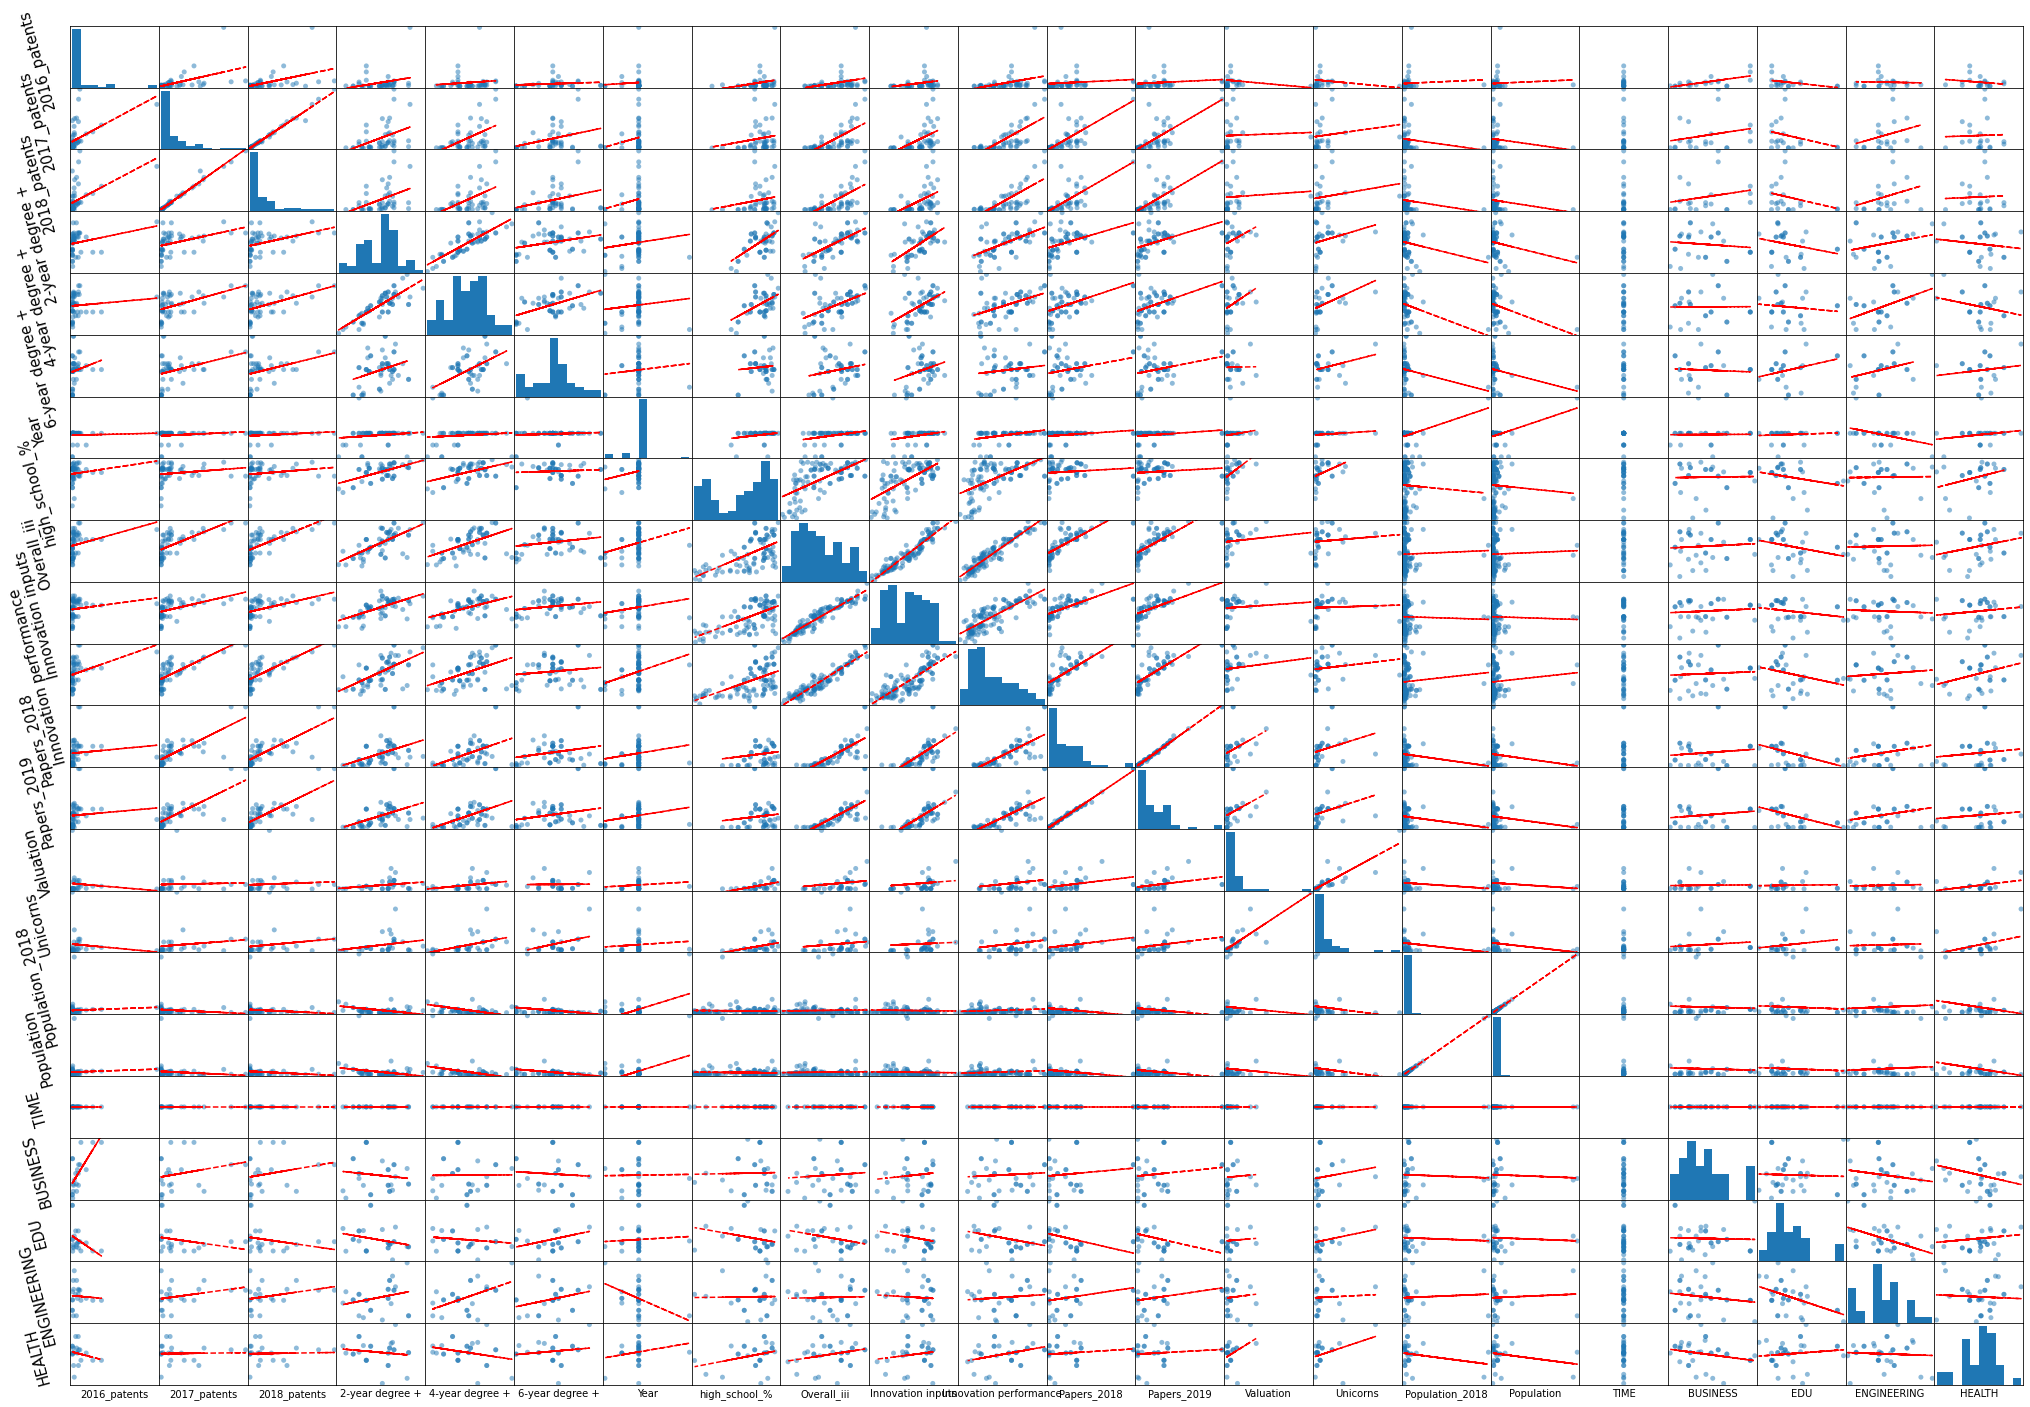

In [33]:
# scatter matrix for a more general picture correlations of trend lines

smat=scatter_matrix(df_table,figsize=(35,25),s=100);
for subaxis in smat:
        for ax in subaxis:
            ax.xaxis.set_ticks([])
            ax.yaxis.set_ticks([])
            ax.yaxis.label.set_size(15)
            ax.xaxis.label.set_size(10)
            ylab=ax.yaxis.label.get_text()
            ax.set_ylabel(ylab,rotation=105, labelpad=25)
            
            
            
            try:
                cs=ax.collections[0]
                csdf=pd.DataFrame(cs.get_offsets())
                xx=csdf.iloc[:,0].astype(float)
                yy=csdf.iloc[:,1].astype(float)
                z4 = np.polyfit(xx,yy, 1)
                p4= np.poly1d(z4)
                ax.plot(xx,p4(xx),"r--")
            except:
                pass
              

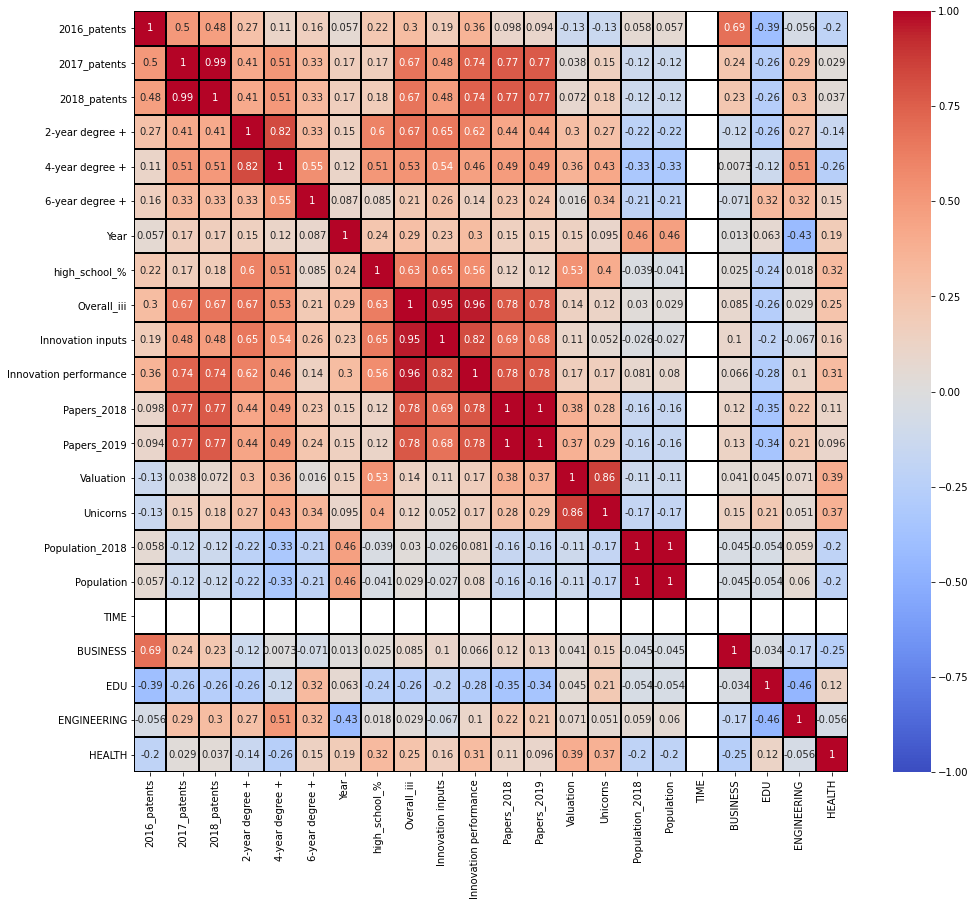

In [34]:
# correlation matrix

def corr_mat(corr, mask=None):
    plt.subplots(figsize=(16, 14))
    ax=plt.gca()
    sns.heatmap(corr, ax=ax,
                vmin=-1, vmax=1,annot=True, center=0,
                cmap='coolwarm', linewidths=1, linecolor='k')
    

corr = df_table.corr()
mask = np.triu(corr)
corr_mat(corr,mask)
plt.show()

Below we can find scatter plots with trend lines, made of the parameters which have varying but in all cases significant correlation, in accordance with the method of the above illustration, where the value in most cases is roughly over 0.4. 

In two subplots, i also draw contrast between some innovation indicators(papers, unicorn valuation and patents)

<Figure size 720x720 with 0 Axes>

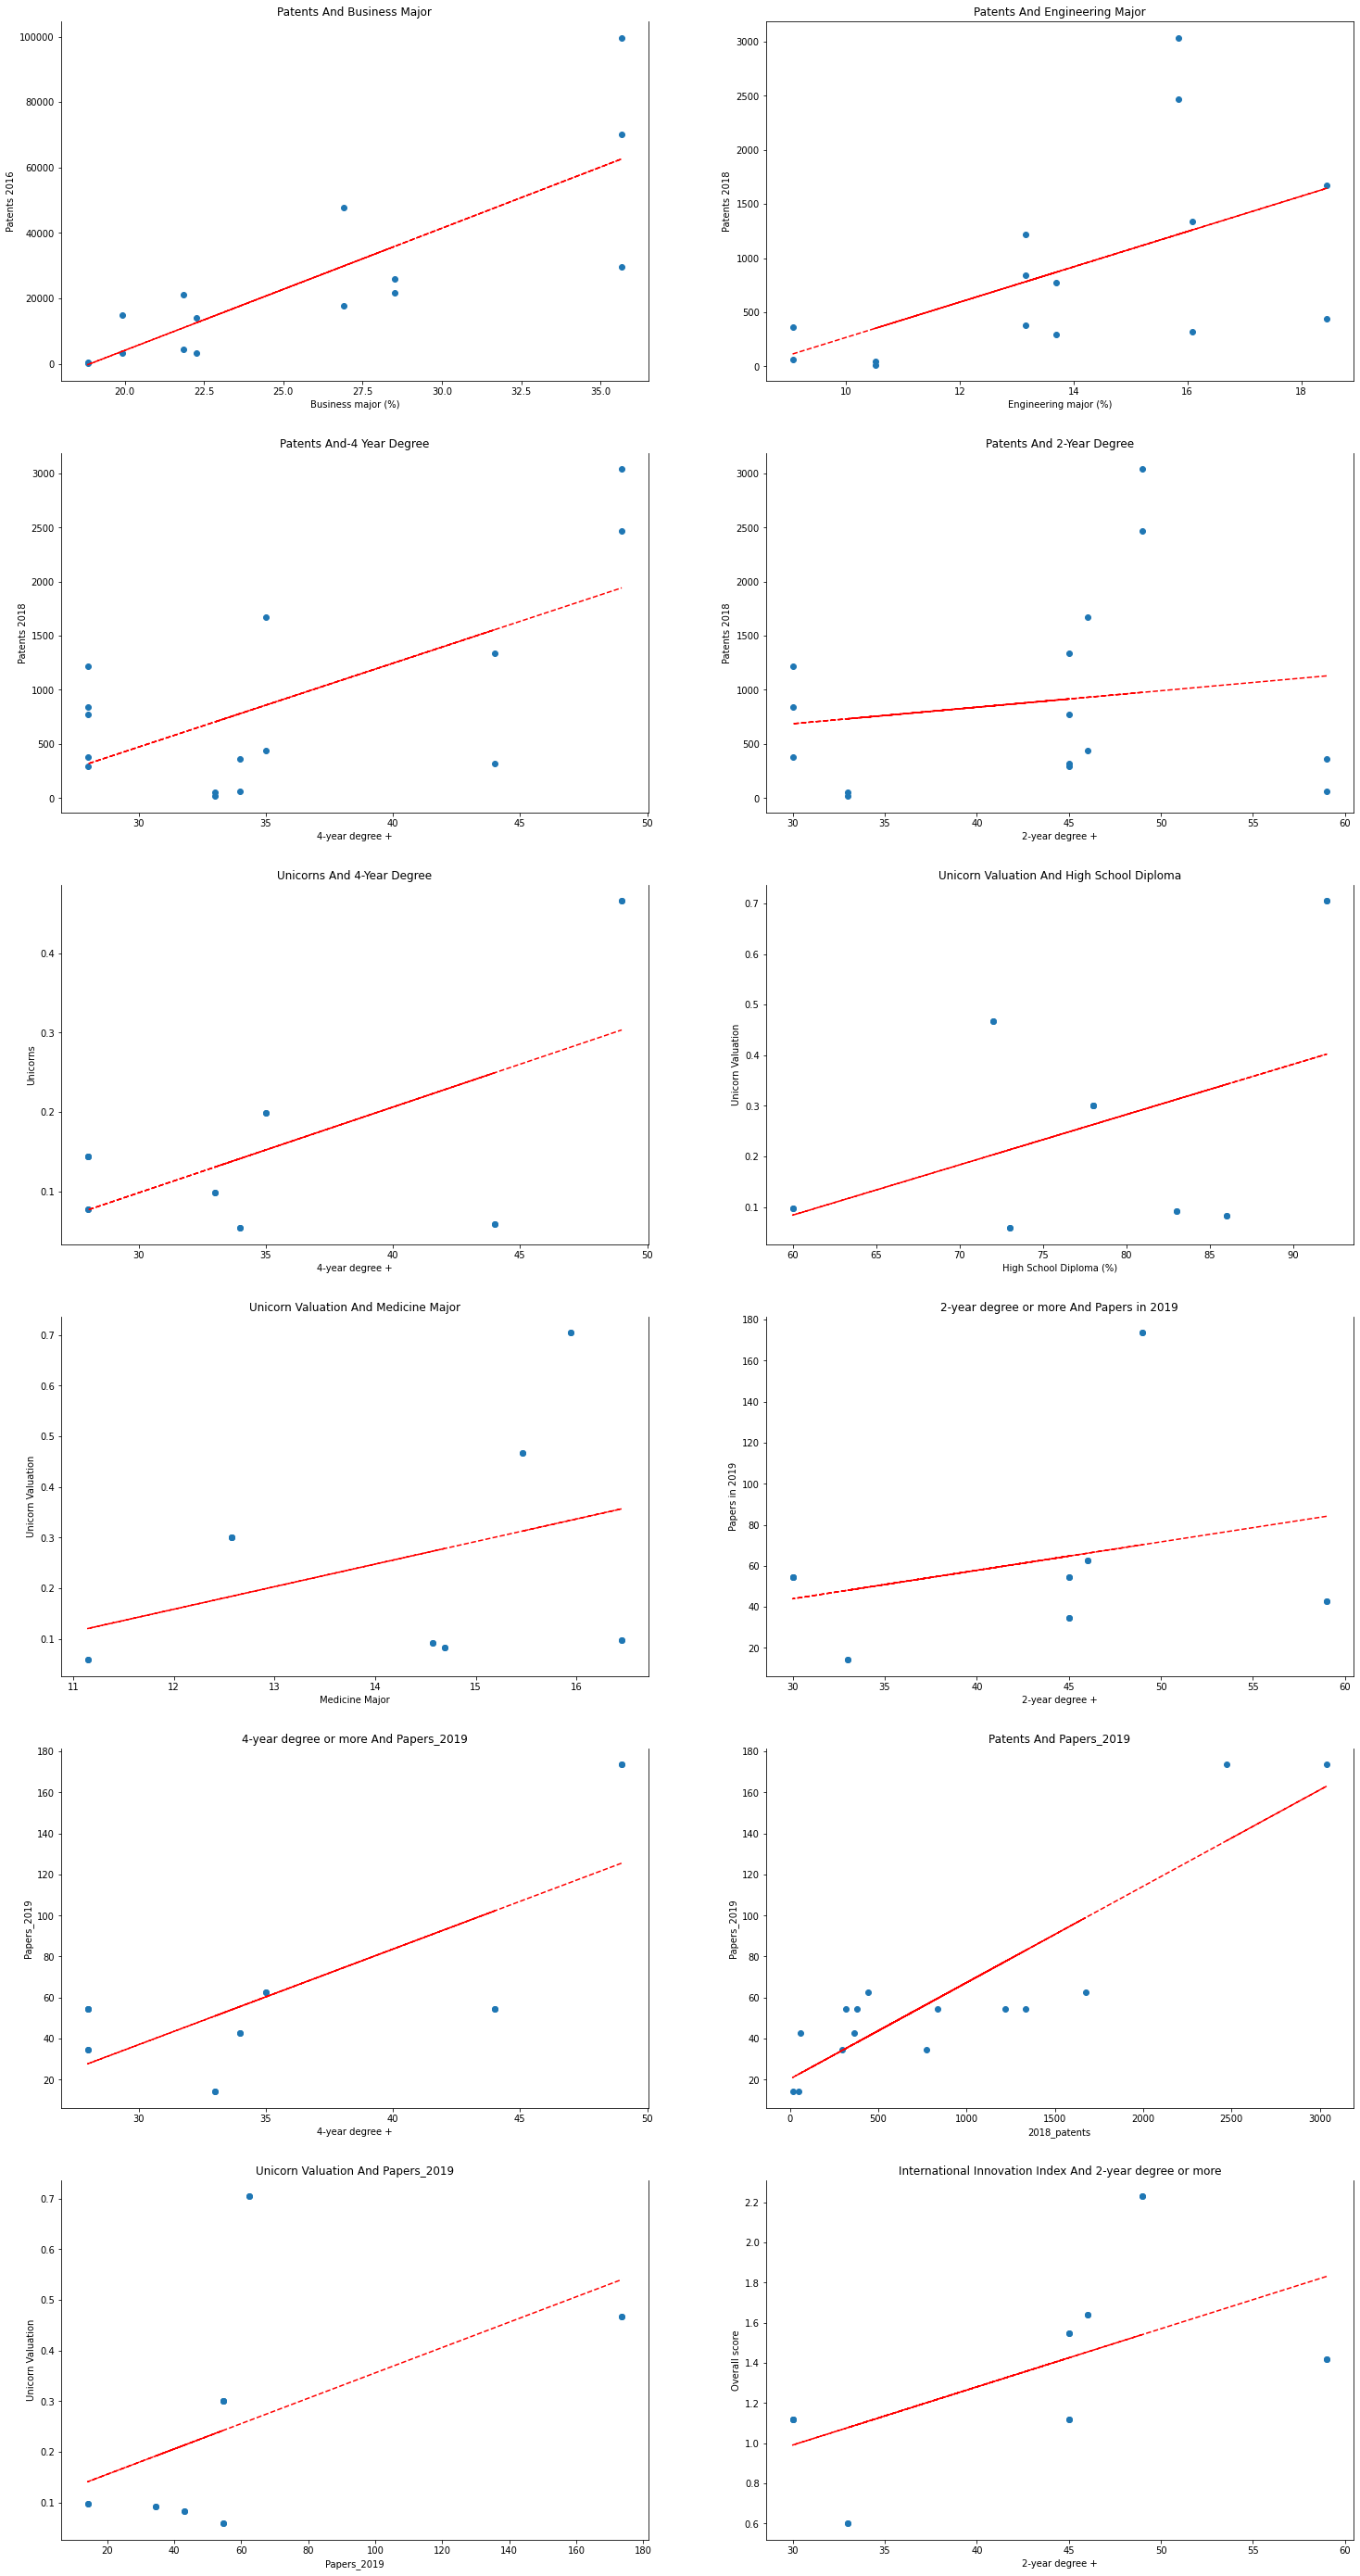

In [35]:
plt.figure(figsize=(10,10))
fig,((ax1, ax2),(ax3, ax4),(ax5, ax6),(ax7,ax8),(ax9,ax10),(ax11,ax12)) = plt.subplots(6,2)
fig.set_size_inches(25, 50)

df_table=df_table.dropna()
bus=df_table["BUSINESS"]
ax1.set_title("Patents And Business Major")
ax1.scatter(df_table["BUSINESS"],df_table["2016_patents"])
ax1.spines["top"].set_visible(False)
ax1.set_xlabel("Business major (%)")
ax1.set_ylabel("Patents 2016")
z1 = np.polyfit(bus,df_table["2016_patents"],1)
p1= np.poly1d(z1)
ax1.plot(bus,p1(bus),"r--")



ax2.set_title("Patents And Engineering Major")
ax2.scatter(df_table["ENGINEERING"],df_table["2018_patents"])
ax1.spines["top"].set_visible(False)
ax2.set_xlabel("Engineering major (%)")
ax2.set_ylabel("Patents 2018")
z2 = np.polyfit(df_table["ENGINEERING"],df_table["2018_patents"],1)
p2= np.poly1d(z2)
ax2.plot(df_table["ENGINEERING"],p2(df_table["ENGINEERING"]),"r--")


ax3.set_title("Patents And-4 Year Degree")
ax3.scatter(df_table["4-year degree +"],df_table["2018_patents"])
ax3.spines["top"].set_visible(False)
ax3.set_xlabel("4-year degree +")
ax3.set_ylabel("Patents 2018")
z3 = np.polyfit(df_table["4-year degree +"],df_table["2018_patents"],1)
p3= np.poly1d(z3)
ax3.plot(df_table["4-year degree +"],p3(df_table["4-year degree +"]),"r--")

ax4.set_title("Patents And 2-Year Degree")
ax4.scatter(df_table["2-year degree +"],df_table["2018_patents"])
ax4.spines["top"].set_visible(False)
ax4.set_xlabel("2-year degree +")
ax4.set_ylabel("Patents 2018")
z4 = np.polyfit(df_table["2-year degree +"],df_table["2018_patents"],1)
p4= np.poly1d(z4)
ax4.plot(df_table["2-year degree +"],p4(df_table["2-year degree +"]),"r--")


ax5.set_title("Unicorns And 4-Year Degree")
ax5.scatter(df_table["4-year degree +"],df_table["Unicorns"])
ax5.spines["top"].set_visible(False)
ax5.set_xlabel("4-year degree +")
ax5.set_ylabel("Unicorns")
z5 = np.polyfit(df_table["4-year degree +"],df_table["Unicorns"],1)
p5= np.poly1d(z5)
ax5.plot(df_table["4-year degree +"],p5(df_table["4-year degree +"]),"r--")

ax6.set_title("Unicorn Valuation And High School Diploma")
ax6.scatter(df_table["high_school_%"],df_table["Valuation"])
ax6.spines["top"].set_visible(False)
ax6.set_xlabel("High School Diploma (%)")
ax6.set_ylabel("Unicorn Valuation")
z6 = np.polyfit(df_table["high_school_%"],df_table["Valuation"],1)
p6= np.poly1d(z6)
ax6.plot(df_table["high_school_%"],p6(df_table["high_school_%"]),"r--")

ax7.set_title("Unicorn Valuation And Medicine Major")
ax7.scatter(df_table["HEALTH"],df_table["Valuation"])
ax7.spines["top"].set_visible(False)
ax7.set_xlabel("Medicine Major")
ax7.set_ylabel("Unicorn Valuation")
z7 = np.polyfit(df_table["HEALTH"],df_table["Valuation"],1)
p7= np.poly1d(z7)
ax7.plot(df_table["HEALTH"],p7(df_table["HEALTH"]),"r--")

ax8.set_title("2-year degree or more And Papers in 2019")
ax8.scatter(df_table["2-year degree +"],df_table["Papers_2019"])
ax8.spines["top"].set_visible(False)
ax8.set_xlabel("2-year degree +")
ax8.set_ylabel("Papers in 2019")
z8 = np.polyfit(df_table["2-year degree +"],df_table["Papers_2019"],1)
p8= np.poly1d(z8)
ax8.plot(df_table["2-year degree +"],p8(df_table["2-year degree +"]),"r--")

ax9.set_title("4-year degree or more And Papers_2019")
ax9.scatter(df_table["4-year degree +"],df_table["Papers_2019"])
ax9.spines["top"].set_visible(False)
ax9.set_xlabel("4-year degree +")
ax9.set_ylabel("Papers_2019")
z9= np.polyfit(df_table["4-year degree +"],df_table["Papers_2019"],1)
p9= np.poly1d(z9)
ax9.plot(df_table["4-year degree +"],p9(df_table["4-year degree +"]),"r--")

ax10.set_title("Patents And Papers_2019")
ax10.scatter(df_table["2018_patents"],df_table["Papers_2019"])
ax10.spines["top"].set_visible(False)
ax10.set_xlabel("2018_patents")
ax10.set_ylabel("Papers_2019")
z10 = np.polyfit(df_table["2018_patents"],df_table["Papers_2019"],1)
p10= np.poly1d(z10)
ax10.plot(df_table["2018_patents"],p10(df_table["2018_patents"]),"r--")

ax11.set_title("Unicorn Valuation And Papers_2019")
ax11.scatter(df_table["Papers_2019"],df_table["Valuation"])
ax11.spines["top"].set_visible(False)
ax11.set_xlabel("Papers_2019")
ax11.set_ylabel("Unicorn Valuation")
z11 = np.polyfit(df_table["Papers_2019"],df_table["Valuation"],1)
p11= np.poly1d(z11)
ax11.plot(df_table["Papers_2019"],p11(df_table["Papers_2019"]),"r--")

ax12.set_title("International Innovation Index And 2-year degree or more")
ax12.scatter(df_table["2-year degree +"],df_table["Overall_iii"])
ax12.spines["top"].set_visible(False)
ax12.set_xlabel("2-year degree +")
ax12.set_ylabel("Overall score")
z12 = np.polyfit(df_table["2-year degree +"],df_table["Overall_iii"],1)
p12= np.poly1d(z12)
ax12.plot(df_table["2-year degree +"],p12(df_table["2-year degree +"]),"r--")

**To sum up:**

While we should be wary of the limits of operating with small samples, we can appreciate many interesting and occasionally unexpected cases like linking the data on medicine majors and unicorn valuation, or the fact that among education attainment factors, the one that sets a base of correlation in a significant value is that of high school education and not college. We can also see that, given the great correlation values and the pronounced trend lines amongst innovation indicators, to the extent that there are visible levels in one of them, it holds true to the larger set of measurements as well.